# Human Activity Recognition

### Importing required libraries

In [1]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]


In [2]:
import os
import re
import numpy as np
import pandas as pd
import math
import statistics as st
import itertools
from scipy import stats
from statsmodels import robust
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

### Statistical Calculations

In [3]:
def correlation(data1, data2):
    corr, p = stats.pearsonr(data1, data2)
    if math.isnan(corr):
        return 0
    else:
        return corr

In [4]:
def sma(x, y, z):
    sum_ = 0
    X = list(x)
    Y = list(y)
    Z = list(z)
    for i in range(len(X)):
        sum_ += abs(X[i]) + abs(Y[i]) + abs(Z[i])
    return sum_ / len(X)

In [5]:
def calc_entropy(data):                     
    entropy = stats.entropy(data, base=2)
    if math.isinf(entropy) or math.isnan(entropy):
        return -1
    else:
        return entropy

In [6]:
def energy(data):
    sum_ = 0
    for d in data:
        sum_ += d ** 2
        
    return sum_ / len(data)

In [7]:
def iqr(data):
    return np.subtract(*np.percentile(data, [75, 25]))

### EDA

In [8]:
def read_dataset(dirName):
    print("Reading Raw Data...")
    raw_datasets = []
    raw_datalabels = []
    for filename in os.listdir(dirName):
        if filename.endswith(".csv"):
            raw = pd.read_csv(os.path.join(dirName, filename))
            cols = raw.columns
            cols = cols.str.replace('([\(\[]).*?([\)\]])', '')
            cols = cols.str.replace('\s','_')
            raw.columns = cols
            to_drop = []
            for col in raw.columns:
                if not ("_X_" in col or "_Y_" in col or "_Z_" in col):
                    to_drop.append(col)
            raw = raw.drop(to_drop, axis=1)
            column_names = raw.columns
            raw = raw.drop_duplicates(keep='last')
            raw_datasets.append(raw)
            raw_datalabels.append(filename.split(".")[0])            
    return raw_datasets, raw_datalabels, column_names

## Processing RawData

In [9]:
def process_raw_data(raw_datasets, raw_datalabels, column_names):
    print("Processing Data...")
    datasets = dict()
    statistics = ["mean", "mad", "max", "min", "std", "energy", "iqr", "entropy"]
    diff_col_names = []
    for col in range(0,len(column_names),3):
        diff_col_names.append(column_names[col][:len(column_names[col])-3])
    for col in column_names:
        for stat in statistics:
            key = col + "~" + stat  
            datasets[key] = []
    for col in diff_col_names:
        datasets[col+"_XY_~correlation"] = []
        datasets[col+"_YZ_~correlation"] = []
        datasets[col+"_ZX_~correlation"] = []
        datasets[col+"_XYZ_~sma"] = []
    datasets["Activity"] = []
    #print(diff_col_names)
    for ind,raw_data in enumerate(raw_datasets):
        for d in range(0, len(raw_data), 5):
            if d+5 < len(raw_data):
                data = raw_data[d:d+5]
            else:
                break
            for c in diff_col_names:
                col_X = c + "_X_"
                col_Y = c + "_Y_"
                col_Z = c + "_Z_"
                datasets[col_X+"~mean"].append(st.mean(data[col_X])) 
                datasets[col_Y+"~mean"].append(st.mean(data[col_Y])) 
                datasets[col_Z+"~mean"].append(st.mean(data[col_Z])) 

                datasets[col_X+"~mad"].append(robust.mad(np.array(data[col_X]))) 
                datasets[col_Y+"~mad"].append(robust.mad(np.array(data[col_Y]))) 
                datasets[col_Z+"~mad"].append(robust.mad(np.array(data[col_Z]))) 

                datasets[col_X+"~max"].append(max(data[col_X])) 
                datasets[col_Y+"~max"].append(max(data[col_Y])) 
                datasets[col_Z+"~max"].append(max(data[col_Z])) 

                datasets[col_X+"~min"].append(min(data[col_X]))
                datasets[col_Y+"~min"].append(min(data[col_Y]))
                datasets[col_Z+"~min"].append(min(data[col_Z])) 

                datasets[col_X+"~std"].append(st.stdev(data[col_X])) 
                datasets[col_Y+"~std"].append(st.stdev(data[col_Y])) 
                datasets[col_Z+"~std"].append(st.stdev(data[col_Z]))

                datasets[col_X+"~energy"].append(energy(data[col_X]))
                datasets[col_Y+"~energy"].append(energy(data[col_Y]))
                datasets[col_Z+"~energy"].append(energy(data[col_Z])) 

                datasets[col_X+"~iqr"].append(iqr(data[col_X]))
                datasets[col_Y+"~iqr"].append(iqr(data[col_Y])) 
                datasets[col_Z+"~iqr"].append(iqr(data[col_Z])) 

                datasets[col_X+"~entropy"].append(calc_entropy(data[col_X])) 
                datasets[col_Y+"~entropy"].append(calc_entropy(data[col_Y])) 
                datasets[col_Z+"~entropy"].append(calc_entropy(data[col_Z])) 

                datasets[c+"_XY_~correlation"].append(correlation(data[col_X], data[col_Y])) 
                datasets[c+"_YZ_~correlation"].append(correlation(data[col_Y], data[col_Z])) 
                datasets[c+"_ZX_~correlation"].append(correlation(data[col_Z], data[col_X])) 
                
                datasets[c+"_XYZ_~sma"].append(sma(data[col_X], data[col_Y], data[col_Z]))

            datasets["Activity"].append(raw_datalabels[ind])
            data = []
        print(raw_datalabels[ind]," collected and processed")
    print("Done")
    return datasets

In [10]:
og_raw_dataset, og_raw_datalabels, og_column_names = read_dataset("OriginalRawDataSet")
original_dataset = process_raw_data(og_raw_dataset, og_raw_datalabels, og_column_names)
df = pd.DataFrame.from_dict(original_dataset, orient="columns")
df.to_csv("Processed_DataSet/OriginalProcessedData.csv",index=False)
print("Saved to OriginalProcessedData.csv")

Reading Raw Data...
Processing Data...
Laying  collected and processed
Sitting  collected and processed
Standing  collected and processed
Walking  collected and processed
WalkingDownstairs  collected and processed
WalkingUpstairs  collected and processed
Done
Saved to OriginalProcessedData.csv


In [11]:
new_raw_dataset, new_raw_datalabels, new_column_names = read_dataset("NewRawDataSet")
new_dataset = process_raw_data(new_raw_dataset, new_raw_datalabels, new_column_names)
df = pd.DataFrame.from_dict(new_dataset, orient="columns")
df.to_csv("Processed_DataSet/NewProcessedData.csv",index=False)
print("Saved to NewProcessedData.csv")

Reading Raw Data...
Processing Data...
Cycling  collected and processed
Football  collected and processed
Jogging  collected and processed
JumpRope  collected and processed
Pushups  collected and processed
Swimming  collected and processed
Done
Saved to NewProcessedData.csv


In [12]:
df.head()

,ACCELEROMETER_X_~mean,ACCELEROMETER_X_~mad,ACCELEROMETER_X_~max,ACCELEROMETER_X_~min,ACCELEROMETER_X_~std,ACCELEROMETER_X_~energy,ACCELEROMETER_X_~iqr,ACCELEROMETER_X_~entropy,ACCELEROMETER_Y_~mean,ACCELEROMETER_Y_~mad,...,GRAVITY_XYZ_~sma,LINEAR_ACCELERATION_XY_~correlation,LINEAR_ACCELERATION_YZ_~correlation,LINEAR_ACCELERATION_ZX_~correlation,LINEAR_ACCELERATION_XYZ_~sma,GYROSCOPE_XY_~correlation,GYROSCOPE_YZ_~correlation,GYROSCOPE_ZX_~correlation,GYROSCOPE_XYZ_~sma,Activity
0,-2.24410,5.162717,5.0936,-10.2466,5.618788,30.292604,3.5540,-1.000000,-5.12334,5.814173,...,13.78506,-0.851205,0.674731,-0.271871,10.47932,0.758699,0.811256,0.584362,3.48560,Cycling
1,2.26972,3.203459,9.0307,-4.2698,4.788458,23.495097,2.2361,-1.000000,-3.17382,3.371882,...,16.57846,0.307860,-0.702507,0.278854,4.11702,-0.631216,-0.592836,0.364992,2.30456,Cycling
2,3.50124,3.183888,6.1158,1.3241,1.992621,15.435111,2.7126,2.123967,-7.28284,1.268959,...,16.22722,-0.988661,0.299773,-0.233203,5.09032,0.609803,-0.711239,-0.977411,0.96548,Cycling
3,7.24610,0.827144,12.0736,5.2623,2.816165,58.850595,1.6998,2.243473,-8.86150,0.606977,...,15.55772,0.619641,0.861506,0.357356,4.43952,0.373614,0.407887,0.954196,0.96144,Cycling
4,1.86176,10.841974,17.1239,-6.6052,9.454199,74.971660,7.6767,-1.000000,-6.81932,3.414729,...,16.08990,-0.814058,0.091749,-0.538936,10.91022,-0.825836,-0.490990,0.505931,2.69002,Cycling


## Spliting data

In [13]:
def split_data(processed_file, test_size=0.3):
    processed = pd.read_csv("Processed_DataSet/"+processed_file)
    print("No of NAN in processed: {}".format(processed.isnull().values.sum()))
    print("No of duplicates in processed: {}".format(sum(processed.duplicated())))
    train, test = train_test_split(processed, test_size=test_size, shuffle=True)
    y_train = train.Activity
    X_train = train.drop(['Activity'], axis=1)
    y_test = test.Activity
    X_test = test.drop(['Activity'], axis=1)
    return X_train, y_train, X_test, y_test

In [14]:
print("Obtaining Original Processed Data")
og_X_train, og_y_train, og_X_test, og_y_test = split_data("OriginalProcessedData.csv")
og_labels = ['Sitting', 'Standing','Walking', 'WalkingDownStairs', 'WalkingUpStairs', 'Laying']
print("\nObtaining New Processed Data")
new_X_train, new_y_train, new_X_test, new_y_test = split_data("NewProcessedData.csv")
new_labels = ['Cycling', 'Football', 'Swimming', 'Jogging', 'Pushups', 'JumpRope']

Obtaining Original Processed Data
No of NAN in processed: 0
No of duplicates in processed: 0

Obtaining New Processed Data
No of NAN in processed: 0
No of duplicates in processed: 0


## Data Visualisation using t-sne

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
def perform_tsne(X_data, y_data, perplexities, markers, n_iter=1000):
    
    for index, perplexity in enumerate(perplexities):
        # perform t-sne
        print("\nPerforming tsne with perplexity {} and with {} iterations at max".format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare data for seaborn
        print("Creating plot for this t-sne visualization")
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1], 'label':y_data})
        
        # draw the plot in appropriate palce in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1",markers=markers)
        plt.title("perplexity : {} and max_iter: {}".format(perplexity, n_iter))
        plt.show()
        print("Done")
    return X_reduced

## t-sne on Original Dataset


Performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1563 samples in 0.002s...
[t-SNE] Computed neighbors for 1563 samples in 0.291s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1563
[t-SNE] Computed conditional probabilities for sample 1563 / 1563
[t-SNE] Mean sigma: 1.489536
[t-SNE] Computed conditional probabilities in 0.064s
[t-SNE] Iteration 50: error = 85.6356125, gradient norm = 0.2470863 (50 iterations in 1.233s)
[t-SNE] Iteration 100: error = 75.1241913, gradient norm = 0.1941946 (50 iterations in 0.913s)
[t-SNE] Iteration 150: error = 71.6824265, gradient norm = 0.1679501 (50 iterations in 0.784s)
[t-SNE] Iteration 200: error = 69.9062958, gradient norm = 0.1669274 (50 iterations in 0.791s)
[t-SNE] Iteration 250: error = 68.5975266, gradient norm = 0.1582306 (50 iterations in 0.780s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.597527
[t-SNE] Iteration 300: err

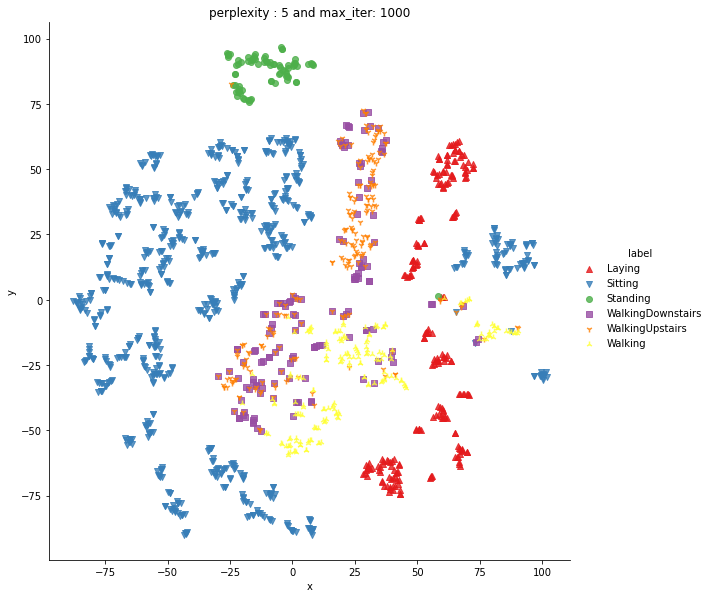

Done

Performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1563 samples in 0.000s...
[t-SNE] Computed neighbors for 1563 samples in 0.197s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1563
[t-SNE] Computed conditional probabilities for sample 1563 / 1563
[t-SNE] Mean sigma: 1.919130
[t-SNE] Computed conditional probabilities in 0.095s
[t-SNE] Iteration 50: error = 77.1751175, gradient norm = 0.2040906 (50 iterations in 0.867s)
[t-SNE] Iteration 100: error = 67.6355896, gradient norm = 0.1411224 (50 iterations in 0.662s)
[t-SNE] Iteration 150: error = 65.0639114, gradient norm = 0.1137893 (50 iterations in 0.820s)
[t-SNE] Iteration 200: error = 63.7767334, gradient norm = 0.1020347 (50 iterations in 0.809s)
[t-SNE] Iteration 250: error = 62.8947906, gradient norm = 0.0881590 (50 iterations in 0.714s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.894791
[t-SNE] Iteration 30

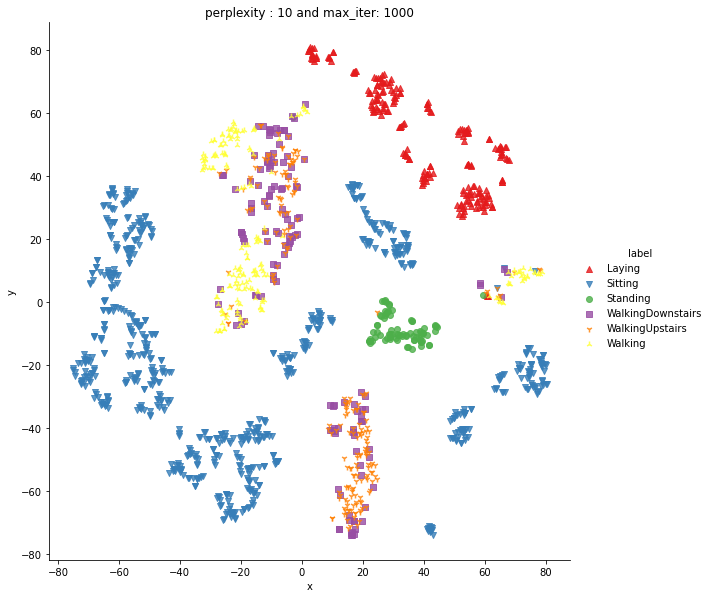

Done

Performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1563 samples in 0.001s...
[t-SNE] Computed neighbors for 1563 samples in 0.225s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1563
[t-SNE] Computed conditional probabilities for sample 1563 / 1563
[t-SNE] Mean sigma: 2.408197
[t-SNE] Computed conditional probabilities in 0.197s
[t-SNE] Iteration 50: error = 69.1641846, gradient norm = 0.1825117 (50 iterations in 0.998s)
[t-SNE] Iteration 100: error = 60.6610527, gradient norm = 0.0824191 (50 iterations in 0.721s)
[t-SNE] Iteration 150: error = 58.7241936, gradient norm = 0.0691389 (50 iterations in 0.689s)
[t-SNE] Iteration 200: error = 57.8485260, gradient norm = 0.0649160 (50 iterations in 0.680s)
[t-SNE] Iteration 250: error = 57.3371658, gradient norm = 0.0623066 (50 iterations in 0.719s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.337166
[t-SNE] Iteration 30

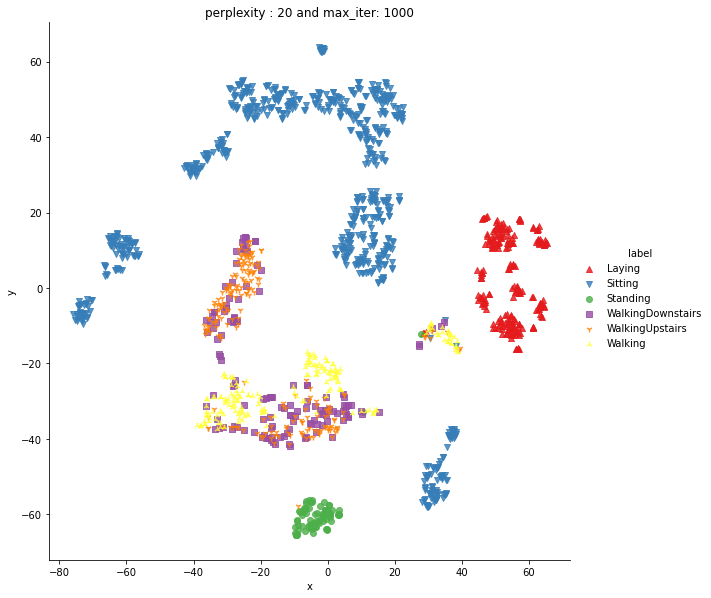

Done


In [16]:
result = perform_tsne(X_data = og_X_train, y_data = og_y_train, perplexities = [5,10,20], markers = ['^', 'v', 'o', 's', '1', '2'])

In [17]:
print(result)

[[ 48.999268   11.301953 ]
 [ 33.924213  -50.71675  ]
 [ 37.049652  -39.745308 ]
 ...
 [  3.78854   -27.064981 ]
 [ -2.3067937 -57.85536  ]
 [ 31.78624   -56.638012 ]]


## t-sne on New Dataset


Performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2162 samples in 0.001s...
[t-SNE] Computed neighbors for 2162 samples in 0.378s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2162
[t-SNE] Computed conditional probabilities for sample 2000 / 2162
[t-SNE] Computed conditional probabilities for sample 2162 / 2162
[t-SNE] Mean sigma: 5.662553
[t-SNE] Computed conditional probabilities in 0.086s
[t-SNE] Iteration 50: error = 98.3499146, gradient norm = 0.1408422 (50 iterations in 1.732s)
[t-SNE] Iteration 100: error = 83.0457764, gradient norm = 0.0812171 (50 iterations in 1.186s)
[t-SNE] Iteration 150: error = 80.0870438, gradient norm = 0.0607200 (50 iterations in 0.955s)
[t-SNE] Iteration 200: error = 78.7638779, gradient norm = 0.0441217 (50 iterations in 0.958s)
[t-SNE] Iteration 250: error = 77.9950485, gradient norm = 0.0419001 (50 iterations in 1.142s)
[t-SNE] KL divergence after 250 iterat

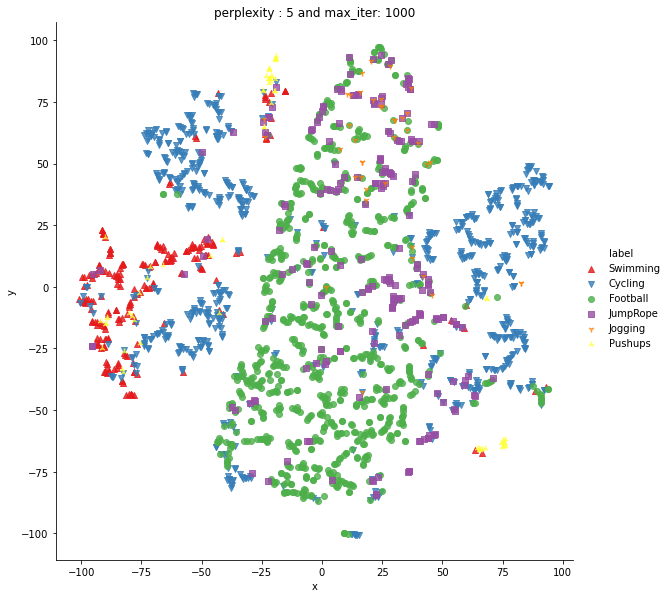

Done

Performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2162 samples in 0.002s...
[t-SNE] Computed neighbors for 2162 samples in 0.397s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2162
[t-SNE] Computed conditional probabilities for sample 2000 / 2162
[t-SNE] Computed conditional probabilities for sample 2162 / 2162
[t-SNE] Mean sigma: 6.768109
[t-SNE] Computed conditional probabilities in 0.171s
[t-SNE] Iteration 50: error = 89.3416138, gradient norm = 0.1364274 (50 iterations in 1.730s)
[t-SNE] Iteration 100: error = 76.8889542, gradient norm = 0.0430286 (50 iterations in 0.989s)
[t-SNE] Iteration 150: error = 74.8662338, gradient norm = 0.0294614 (50 iterations in 0.979s)
[t-SNE] Iteration 200: error = 74.1433792, gradient norm = 0.0208559 (50 iterations in 0.980s)
[t-SNE] Iteration 250: error = 73.8138199, gradient norm = 0.0162748 (50 iterations in 1.013s)
[t-SNE] KL divergence after 250 

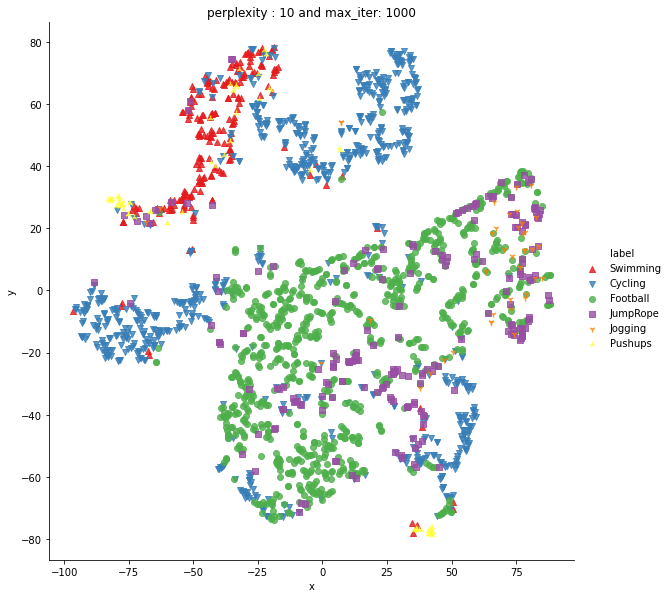

Done

Performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2162 samples in 0.002s...
[t-SNE] Computed neighbors for 2162 samples in 0.456s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2162
[t-SNE] Computed conditional probabilities for sample 2000 / 2162
[t-SNE] Computed conditional probabilities for sample 2162 / 2162
[t-SNE] Mean sigma: 7.970394
[t-SNE] Computed conditional probabilities in 0.367s
[t-SNE] Iteration 50: error = 79.2647781, gradient norm = 0.1292687 (50 iterations in 1.778s)
[t-SNE] Iteration 100: error = 70.0177460, gradient norm = 0.0264501 (50 iterations in 1.441s)
[t-SNE] Iteration 150: error = 69.0087967, gradient norm = 0.0211806 (50 iterations in 1.174s)
[t-SNE] Iteration 200: error = 68.7319717, gradient norm = 0.0061139 (50 iterations in 1.180s)
[t-SNE] Iteration 250: error = 68.6354675, gradient norm = 0.0063589 (50 iterations in 1.188s)
[t-SNE] KL divergence after 250 

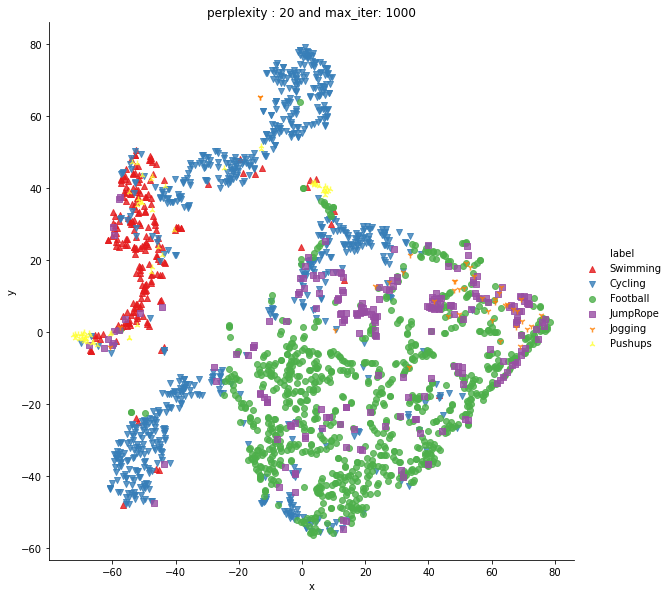

Done


In [18]:
result = perform_tsne(X_data = new_X_train, y_data = new_y_train, perplexities = [5,10,20], markers = ['^', 'v', 'o', 's', '1', '2'])

In [19]:
print(result)

[[-59.262486   32.25737  ]
 [-48.728935  -33.073788 ]
 [  1.5749705 -18.774155 ]
 ...
 [-20.850359   43.090096 ]
 [  1.556294   16.937391 ]
 [ 15.384541  -19.541563 ]]


# Model Building

In [20]:
import matplotlib.colors as colors

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime

## Confusion Matrix

In [21]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

## Model Performance

In [22]:
# generic function to run any model specified
Accuracy = []
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, print_cm=True, cm_map=plt.cm.Greens):
    # to store results at various phases
    results = dict()
    global Accuracy
    # time at which model starts training
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print("Done\n\n")
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done\n\n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing_time(HH:MM:SS.ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('-----------------------')
    print('|       Accuracy      |')
    print('-----------------------')
    print('\n      {}\n\n'.format(accuracy))
    model_name = type(model).__name__ + ' ' +namestr(X_test, globals())[0]
    
    Accuracy.append({'model_name': model_name ,'accuracy' : accuracy})
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('-----------------------')
        print('|   Confusion Matrix  |')
        print('-----------------------')
        print('\n {}'.format(cm))
    
    # plot confusion matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized Confusion Matrix', cmap=cm_map)
    plt.show()
    
    # get classification report
    print('-----------------------------')
    print('|   Classification Report   |')
    print('-----------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained model to the results
    results['model'] = model
    
    return results,model

### Determining Best Parameters from GridSearch

In [23]:
# function to print the gridsearch Attributes
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('-----------------------')
    print('|    Best Estimator   |')
    print('-----------------------')
    print('\n\t{}\n'.format(model.best_estimator_))
    
    # parameters that gave best results while performing grid search
    print('-----------------------')
    print('|   Best Parameters   |')
    print('-----------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))
    
    

### Performing Model

In [24]:
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn import tree

## Support Vector Machine

### Polynomial Model

Original DataSet
training the model..
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done


training_time(HH:MM:SS.ms) - 0:00:16.463806


Predicting test data
Done


testing_time(HH:MM:SS.ms) - 0:00:00.099735


-----------------------
|       Accuracy      |
-----------------------

      0.917910447761194


-----------------------
|   Confusion Matrix  |
-----------------------

 [[ 85   0   0   0   0   0]
 [  0 303   0   0   0   0]
 [  0   0  39   0   0   0]
 [  0   1   0  89   2   0]
 [  0   0   1   2  32  35]
 [  0   0   0   3  11  67]]


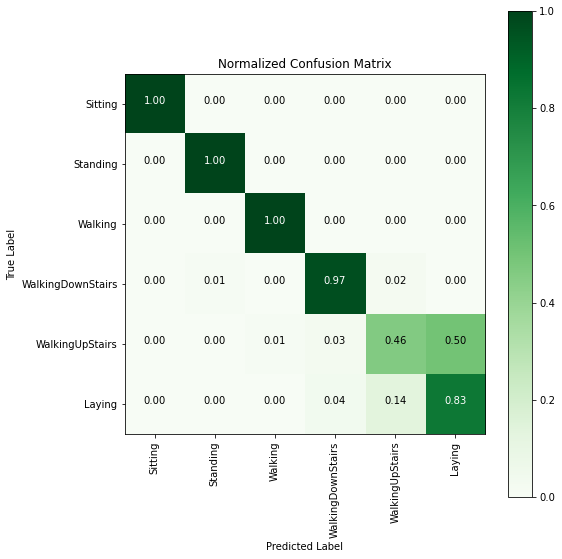

-----------------------------
|   Classification Report   |
-----------------------------
                   precision    recall  f1-score   support

           Laying       1.00      1.00      1.00        85
          Sitting       1.00      1.00      1.00       303
         Standing       0.97      1.00      0.99        39
          Walking       0.95      0.97      0.96        92
WalkingDownstairs       0.71      0.46      0.56        70
  WalkingUpstairs       0.66      0.83      0.73        81

         accuracy                           0.92       670
        macro avg       0.88      0.88      0.87       670
     weighted avg       0.92      0.92      0.91       670


New DataSet
training the model..
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done


training_time(HH:MM:SS.ms) - 0:00:31.990835


Predicting test data
Done


testing_time(HH:MM:SS.ms) - 0:00:00.224399


-----------------------
|       Accuracy      |
-----------------------

      0.85113268608414

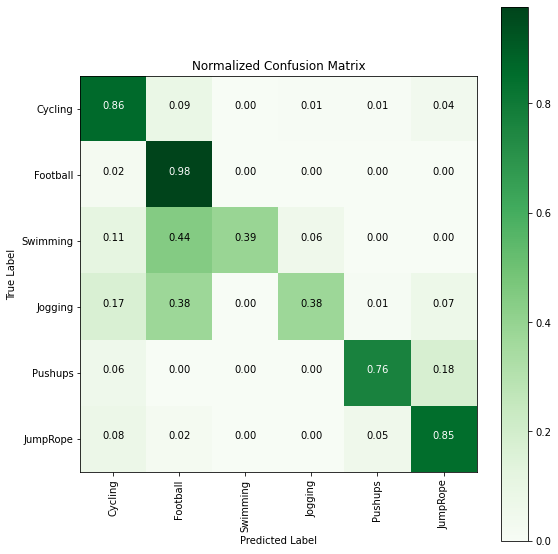

-----------------------------
|   Classification Report   |
-----------------------------
              precision    recall  f1-score   support

     Cycling       0.89      0.86      0.88       324
    Football       0.84      0.98      0.90       388
     Jogging       1.00      0.39      0.56        18
    JumpRope       0.92      0.38      0.53        88
     Pushups       0.62      0.76      0.68        17
    Swimming       0.77      0.85      0.81        92

    accuracy                           0.85       927
   macro avg       0.84      0.70      0.73       927
weighted avg       0.86      0.85      0.84       927



In [25]:
poly_kernel = svm.SVC(kernel='poly')
poly_params = {'C':[0.125, 0.5, 1, 2, 8, 16], 'degree': [1, 2, 3, 4, 5]}
poly_svc_grid_1 = GridSearchCV(poly_kernel, param_grid=poly_params, n_jobs=-1, verbose=1)
poly_svc_grid_2 = GridSearchCV(poly_kernel, param_grid=poly_params, n_jobs=-1, verbose=1)
print("Original DataSet")
og_poly_svc_grid_results , svm_poly_og_model = perform_model(poly_svc_grid_1, og_X_train, og_y_train, og_X_test, og_y_test,class_labels=og_labels)
print("\nNew DataSet")
new_poly_svc_grid_results , svm_poly_new_model = perform_model(poly_svc_grid_2, new_X_train, new_y_train, new_X_test, new_y_test,class_labels=new_labels)

In [26]:
print("Original DataSet")
print_grid_search_attributes(og_poly_svc_grid_results['model'])
print("\nNew DataSet")
print_grid_search_attributes(new_poly_svc_grid_results['model'])

Original DataSet
-----------------------
|    Best Estimator   |
-----------------------

	SVC(C=16, degree=2, kernel='poly')

-----------------------
|   Best Parameters   |
-----------------------
	Parameters of best estimator : 

	{'C': 16, 'degree': 2}


New DataSet
-----------------------
|    Best Estimator   |
-----------------------

	SVC(C=16, degree=1, kernel='poly')

-----------------------
|   Best Parameters   |
-----------------------
	Parameters of best estimator : 

	{'C': 16, 'degree': 1}



### Radial Basis Function (rbf) Model

Original DataSet
training the model..
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done


training_time(HH:MM:SS.ms) - 0:00:17.995831


Predicting test data
Done


testing_time(HH:MM:SS.ms) - 0:00:00.170068


-----------------------
|       Accuracy      |
-----------------------

      0.9298507462686567


-----------------------
|   Confusion Matrix  |
-----------------------

 [[ 85   0   0   0   0   0]
 [  0 303   0   0   0   0]
 [  0   0  39   0   0   0]
 [  0   3   0  89   0   0]
 [  0   0   0   1  43  26]
 [  0   1   0   1  15  64]]


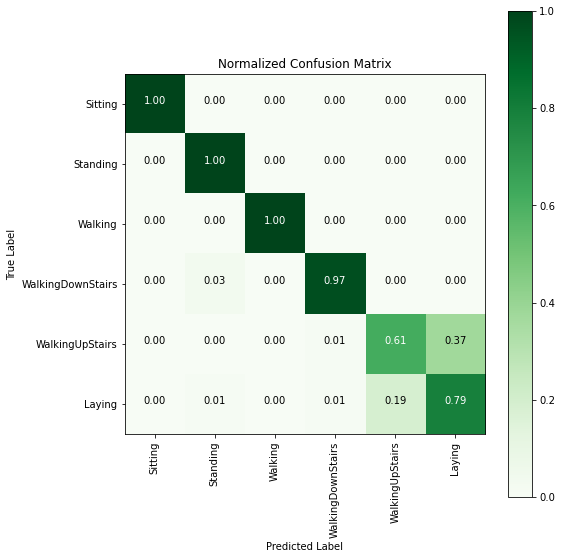

-----------------------------
|   Classification Report   |
-----------------------------
                   precision    recall  f1-score   support

           Laying       1.00      1.00      1.00        85
          Sitting       0.99      1.00      0.99       303
         Standing       1.00      1.00      1.00        39
          Walking       0.98      0.97      0.97        92
WalkingDownstairs       0.74      0.61      0.67        70
  WalkingUpstairs       0.71      0.79      0.75        81

         accuracy                           0.93       670
        macro avg       0.90      0.90      0.90       670
     weighted avg       0.93      0.93      0.93       670


New DataSet
training the model..
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done


training_time(HH:MM:SS.ms) - 0:01:06.926047


Predicting test data
Done


testing_time(HH:MM:SS.ms) - 0:00:00.520214


-----------------------
|       Accuracy      |
-----------------------

      0.87486515641855

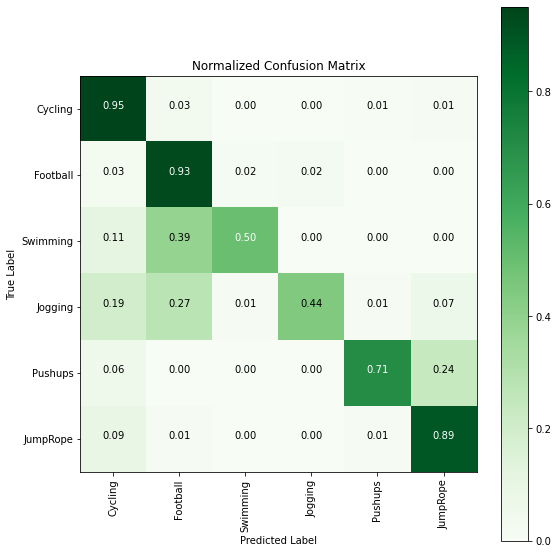

-----------------------------
|   Classification Report   |
-----------------------------
              precision    recall  f1-score   support

     Cycling       0.89      0.95      0.92       324
    Football       0.90      0.93      0.91       388
     Jogging       0.56      0.50      0.53        18
    JumpRope       0.81      0.44      0.57        88
     Pushups       0.75      0.71      0.73        17
    Swimming       0.85      0.89      0.87        92

    accuracy                           0.87       927
   macro avg       0.79      0.74      0.75       927
weighted avg       0.87      0.87      0.87       927



In [27]:
rbf_kernel = svm.SVC(kernel='rbf')
rbf_params = {'C':[55, 60, 65, 81, 90], 'gamma':['scale', 0.01, 0.03, 0.05, 0.07]}
rbf_svc_grid_1 = GridSearchCV(rbf_kernel, param_grid=rbf_params, n_jobs=-1, verbose=1)
rbf_svc_grid_2 = GridSearchCV(rbf_kernel, param_grid=rbf_params, n_jobs=-1, verbose=1)
print("Original DataSet")
og_rbf_svc_grid_results , svm_rbf_og_model= perform_model(rbf_svc_grid_1, og_X_train, og_y_train, og_X_test, og_y_test,class_labels=og_labels)
print("\nNew DataSet")
new_rbf_svc_grid_results , svm_rbf_new_model = perform_model(rbf_svc_grid_2, new_X_train, new_y_train, new_X_test, new_y_test,class_labels=new_labels)

In [28]:
print("Original DataSet")
print_grid_search_attributes(og_rbf_svc_grid_results['model'])
print("\nNew DataSet")
print_grid_search_attributes(new_rbf_svc_grid_results['model'])

Original DataSet
-----------------------
|    Best Estimator   |
-----------------------

	SVC(C=81)

-----------------------
|   Best Parameters   |
-----------------------
	Parameters of best estimator : 

	{'C': 81, 'gamma': 'scale'}


New DataSet
-----------------------
|    Best Estimator   |
-----------------------

	SVC(C=90)

-----------------------
|   Best Parameters   |
-----------------------
	Parameters of best estimator : 

	{'C': 90, 'gamma': 'scale'}



## K-Nearest Neighbours

Original DataSet
training the model..
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done


training_time(HH:MM:SS.ms) - 0:00:04.553513


Predicting test data
Done


testing_time(HH:MM:SS.ms) - 0:00:00.310131


-----------------------
|       Accuracy      |
-----------------------

      0.8970149253731343


-----------------------
|   Confusion Matrix  |
-----------------------

 [[ 85   0   0   0   0   0]
 [  0 303   0   0   0   0]
 [  0   0  39   0   0   0]
 [  1   0   0  86   3   2]
 [  1   0   2  10  28  29]
 [  0   2   1   6  12  60]]


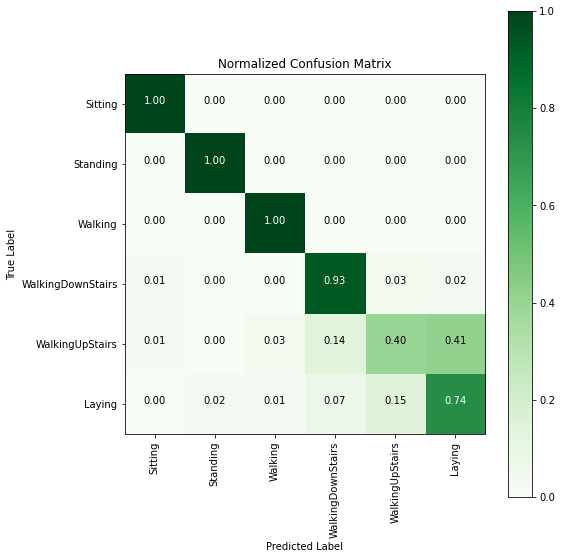

-----------------------------
|   Classification Report   |
-----------------------------
                   precision    recall  f1-score   support

           Laying       0.98      1.00      0.99        85
          Sitting       0.99      1.00      1.00       303
         Standing       0.93      1.00      0.96        39
          Walking       0.84      0.93      0.89        92
WalkingDownstairs       0.65      0.40      0.50        70
  WalkingUpstairs       0.66      0.74      0.70        81

         accuracy                           0.90       670
        macro avg       0.84      0.85      0.84       670
     weighted avg       0.89      0.90      0.89       670


New DataSet
training the model..
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done


training_time(HH:MM:SS.ms) - 0:00:08.065215


Predicting test data
Done


testing_time(HH:MM:SS.ms) - 0:00:00.908217


-----------------------
|       Accuracy      |
-----------------------

      0.83818770226537

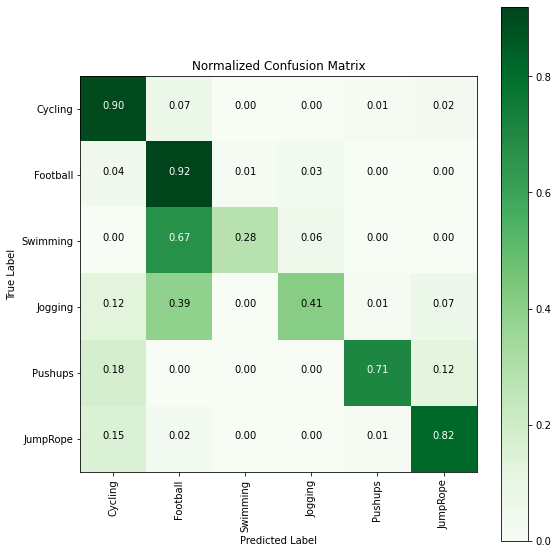

-----------------------------
|   Classification Report   |
-----------------------------
              precision    recall  f1-score   support

     Cycling       0.87      0.90      0.89       324
    Football       0.84      0.92      0.88       388
     Jogging       0.62      0.28      0.38        18
    JumpRope       0.71      0.41      0.52        88
     Pushups       0.71      0.71      0.71        17
    Swimming       0.83      0.82      0.82        92

    accuracy                           0.84       927
   macro avg       0.76      0.67      0.70       927
weighted avg       0.83      0.84      0.83       927



In [29]:
knn_params = {'n_neighbors':[7, 9, 11, 13, 17], 'weights': ['uniform','distance'], 'algorithm': ['ball_tree', 'kd_tree','brute']}
knn_kernel = neighbors.KNeighborsClassifier()
knn_grid_1 = GridSearchCV(knn_kernel, param_grid=knn_params, n_jobs=-1, verbose=1)
knn_grid_2 = GridSearchCV(knn_kernel, param_grid=knn_params, n_jobs=-1, verbose=1)
print("Original DataSet")
og_knn_grid_results , knn_og_model = perform_model(knn_grid_1, og_X_train, og_y_train, og_X_test, og_y_test,class_labels=og_labels)
print("\nNew DataSet")
new_knn_grid_results ,knn_new_model = perform_model(knn_grid_2, new_X_train, new_y_train, new_X_test, new_y_test,class_labels=new_labels)

In [30]:
print("Original DataSet")
print_grid_search_attributes(og_knn_grid_results['model'])
print("\nNew DataSet")
print_grid_search_attributes(new_knn_grid_results['model'])

Original DataSet
-----------------------
|    Best Estimator   |
-----------------------

	KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

-----------------------
|   Best Parameters   |
-----------------------
	Parameters of best estimator : 

	{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}


New DataSet
-----------------------
|    Best Estimator   |
-----------------------

	KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7, weights='distance')

-----------------------
|   Best Parameters   |
-----------------------
	Parameters of best estimator : 

	{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}



## Logistic Regression

Original DataSet
training the model..
Fitting 5 folds for each of 112 candidates, totalling 560 fits
Done


training_time(HH:MM:SS.ms) - 0:05:05.790222


Predicting test data
Done


testing_time(HH:MM:SS.ms) - 0:00:00.012964


-----------------------
|       Accuracy      |
-----------------------

      0.9313432835820895


-----------------------
|   Confusion Matrix  |
-----------------------

 [[ 85   0   0   0   0   0]
 [  0 303   0   0   0   0]
 [  0   0  39   0   0   0]
 [  0   2   0  90   0   0]
 [  0   1   0   5  45  19]
 [  0   1   1   1  16  62]]


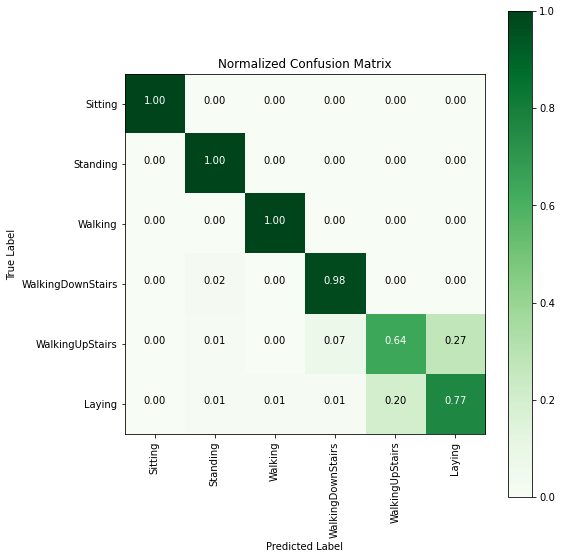

-----------------------------
|   Classification Report   |
-----------------------------
                   precision    recall  f1-score   support

           Laying       1.00      1.00      1.00        85
          Sitting       0.99      1.00      0.99       303
         Standing       0.97      1.00      0.99        39
          Walking       0.94      0.98      0.96        92
WalkingDownstairs       0.74      0.64      0.69        70
  WalkingUpstairs       0.77      0.77      0.77        81

         accuracy                           0.93       670
        macro avg       0.90      0.90      0.90       670
     weighted avg       0.93      0.93      0.93       670


New DataSet
training the model..
Fitting 5 folds for each of 112 candidates, totalling 560 fits
Done


training_time(HH:MM:SS.ms) - 0:09:39.542183


Predicting test data
Done


testing_time(HH:MM:SS.ms) - 0:00:00.002472


-----------------------
|       Accuracy      |
-----------------------

      0.8845738942826

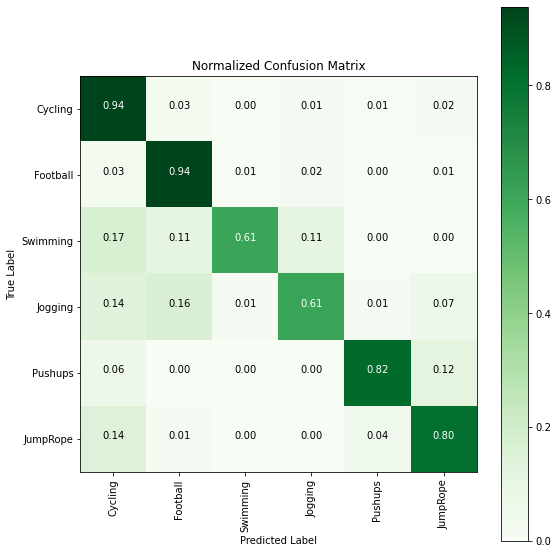

-----------------------------
|   Classification Report   |
-----------------------------
              precision    recall  f1-score   support

     Cycling       0.88      0.94      0.91       324
    Football       0.93      0.94      0.93       388
     Jogging       0.79      0.61      0.69        18
    JumpRope       0.78      0.61      0.69        88
     Pushups       0.64      0.82      0.72        17
    Swimming       0.83      0.80      0.82        92

    accuracy                           0.88       927
   macro avg       0.81      0.79      0.79       927
weighted avg       0.88      0.88      0.88       927



In [31]:
reg_params = {'C':[0.001, 0.125, 0.5, 1, 8, 16, 50], 'class_weight':['balanced',None], 
              'solver':[ 'newton-cg', 'sag', 'saga', 'lbfgs'], 'multi_class':['ovr', 'multinomial']}
reg_kernel = linear_model.LogisticRegression()
reg_grid_1 = GridSearchCV(reg_kernel, param_grid=reg_params, n_jobs=-1, verbose=1)
reg_grid_2 = GridSearchCV(reg_kernel, param_grid=reg_params, n_jobs=-1, verbose=1)
print("Original DataSet")
og_reg_grid_results , lr_og_model = perform_model(reg_grid_1, og_X_train, og_y_train, og_X_test, og_y_test,class_labels=og_labels)
print("\nNew DataSet")
new_reg_grid_results , lr_new_model = perform_model(reg_grid_2, new_X_train, new_y_train, new_X_test, new_y_test,class_labels=new_labels)

In [32]:
print("Original DataSet")
print_grid_search_attributes(og_reg_grid_results['model'])
print("\nNew DataSet")
print_grid_search_attributes(new_reg_grid_results['model'])

Original DataSet
-----------------------
|    Best Estimator   |
-----------------------

	LogisticRegression(C=0.125, multi_class='ovr', solver='newton-cg')

-----------------------
|   Best Parameters   |
-----------------------
	Parameters of best estimator : 

	{'C': 0.125, 'class_weight': None, 'multi_class': 'ovr', 'solver': 'newton-cg'}


New DataSet
-----------------------
|    Best Estimator   |
-----------------------

	LogisticRegression(C=0.125, multi_class='multinomial', solver='newton-cg')

-----------------------
|   Best Parameters   |
-----------------------
	Parameters of best estimator : 

	{'C': 0.125, 'class_weight': None, 'multi_class': 'multinomial', 'solver': 'newton-cg'}



## Decision Trees

Original DataSet
training the model..
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Done


training_time(HH:MM:SS.ms) - 0:00:01.363778


Predicting test data
Done


testing_time(HH:MM:SS.ms) - 0:00:00.004801


-----------------------
|       Accuracy      |
-----------------------

      0.9044776119402985


-----------------------
|   Confusion Matrix  |
-----------------------

 [[ 85   0   0   0   0   0]
 [  0 302   0   0   0   1]
 [  0   0  39   0   0   0]
 [  1   0   1  83   1   6]
 [  1   0   0   1  37  31]
 [  0   0   0   1  20  60]]


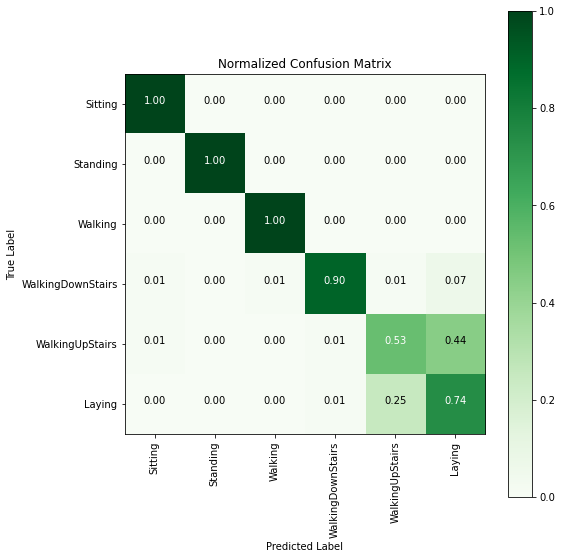

-----------------------------
|   Classification Report   |
-----------------------------
                   precision    recall  f1-score   support

           Laying       0.98      1.00      0.99        85
          Sitting       1.00      1.00      1.00       303
         Standing       0.97      1.00      0.99        39
          Walking       0.98      0.90      0.94        92
WalkingDownstairs       0.64      0.53      0.58        70
  WalkingUpstairs       0.61      0.74      0.67        81

         accuracy                           0.90       670
        macro avg       0.86      0.86      0.86       670
     weighted avg       0.91      0.90      0.90       670


New DataSet
training the model..
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Done


training_time(HH:MM:SS.ms) - 0:00:02.576500


Predicting test data
Done


testing_time(HH:MM:SS.ms) - 0:00:00.001995


-----------------------
|       Accuracy      |
-----------------------

      0.85868392664509

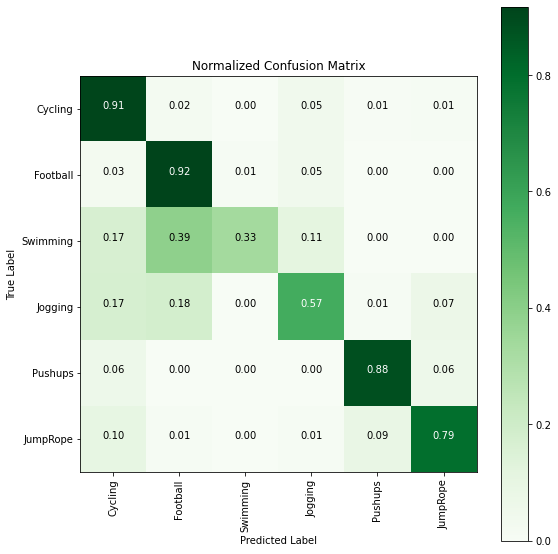

-----------------------------
|   Classification Report   |
-----------------------------
              precision    recall  f1-score   support

     Cycling       0.89      0.91      0.90       324
    Football       0.92      0.92      0.92       388
     Jogging       0.67      0.33      0.44        18
    JumpRope       0.58      0.57      0.57        88
     Pushups       0.58      0.88      0.70        17
    Swimming       0.86      0.79      0.82        92

    accuracy                           0.86       927
   macro avg       0.75      0.73      0.73       927
weighted avg       0.86      0.86      0.86       927



In [33]:
dt_params = {'max_depth':[3, 5, 7, 9], 'splitter': ['best','random'], 'criterion': ['gini', 'entropy'], 'class_weight':['balanced',None]}
dt_kernel = tree.DecisionTreeClassifier()
dt_grid_1 = GridSearchCV(dt_kernel, param_grid=dt_params, n_jobs=-1, verbose=1)
dt_grid_2 = GridSearchCV(dt_kernel, param_grid=dt_params, n_jobs=-1, verbose=1)
print("Original DataSet")
og_dt_grid_results , dt_og_model= perform_model(dt_grid_1, og_X_train, og_y_train, og_X_test, og_y_test,class_labels=og_labels)
print("\nNew DataSet")
new_dt_grid_results , dt_new_model = perform_model(dt_grid_2, new_X_train, new_y_train, new_X_test, new_y_test,class_labels=new_labels)

In [34]:
print("Original DataSet")
print_grid_search_attributes(og_dt_grid_results['model'])
print("\nNew DataSet")
print_grid_search_attributes(new_dt_grid_results['model'])

Original DataSet
-----------------------
|    Best Estimator   |
-----------------------

	DecisionTreeClassifier(criterion='entropy', max_depth=9, splitter='random')

-----------------------
|   Best Parameters   |
-----------------------
	Parameters of best estimator : 

	{'class_weight': None, 'criterion': 'entropy', 'max_depth': 9, 'splitter': 'random'}


New DataSet
-----------------------
|    Best Estimator   |
-----------------------

	DecisionTreeClassifier(max_depth=7)

-----------------------
|   Best Parameters   |
-----------------------
	Parameters of best estimator : 

	{'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}



## XGBoost

Original DataSet
training the model..
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Done


training_time(HH:MM:SS.ms) - 0:27:54.635813


Predicting test data
Done


testing_time(HH:MM:SS.ms) - 0:00:00.032460


-----------------------
|       Accuracy      |
-----------------------

      0.9194029850746268


-----------------------
|   Confusion Matrix  |
-----------------------

 [[ 84   1   0   0   0   0]
 [  0 302   0   0   1   0]
 [  0   0  39   0   0   0]
 [  0   1   0  89   1   1]
 [  0   0   1   1  42  26]
 [  0   0   1   1  19  60]]


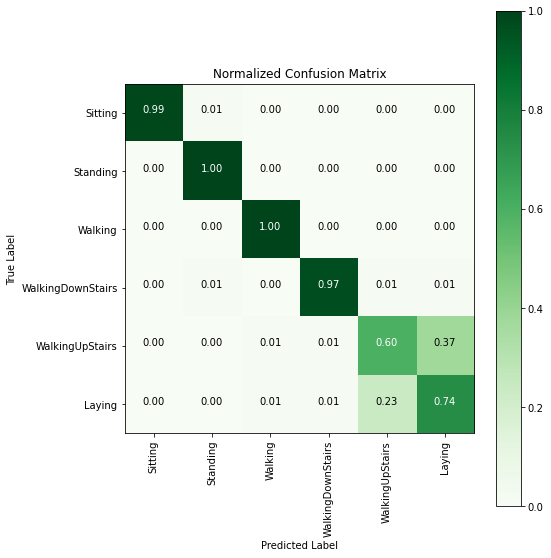

-----------------------------
|   Classification Report   |
-----------------------------
                   precision    recall  f1-score   support

           Laying       1.00      0.99      0.99        85
          Sitting       0.99      1.00      1.00       303
         Standing       0.95      1.00      0.97        39
          Walking       0.98      0.97      0.97        92
WalkingDownstairs       0.67      0.60      0.63        70
  WalkingUpstairs       0.69      0.74      0.71        81

         accuracy                           0.92       670
        macro avg       0.88      0.88      0.88       670
     weighted avg       0.92      0.92      0.92       670


New DataSet
training the model..
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Done


training_time(HH:MM:SS.ms) - 0:45:51.623785


Predicting test data
Done


testing_time(HH:MM:SS.ms) - 0:00:00.057845


-----------------------
|       Accuracy      |
-----------------------

      0.92017259978425

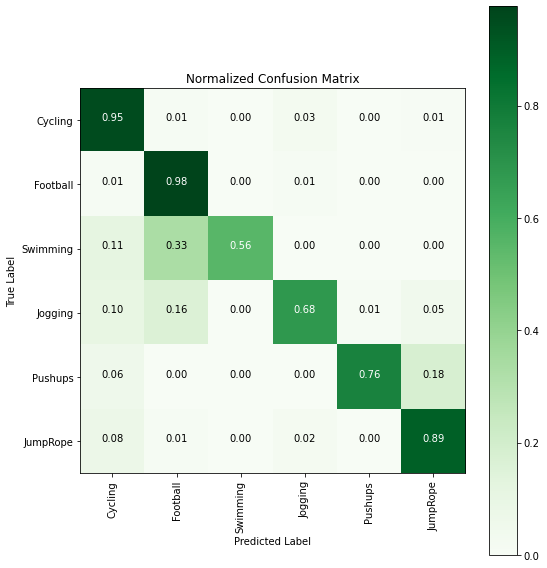

-----------------------------
|   Classification Report   |
-----------------------------
              precision    recall  f1-score   support

     Cycling       0.93      0.95      0.94       324
    Football       0.94      0.98      0.96       388
     Jogging       0.91      0.56      0.69        18
    JumpRope       0.80      0.68      0.74        88
     Pushups       0.87      0.76      0.81        17
    Swimming       0.89      0.89      0.89        92

    accuracy                           0.92       927
   macro avg       0.89      0.80      0.84       927
weighted avg       0.92      0.92      0.92       927



In [54]:
from sklearn.ensemble import GradientBoostingClassifier
xgbc_params = {'max_depth':[3, 5, 7, 9], 'n_estimators':[100,150,200], 'learning_rate':[0.1,0.2], 'random_state':[7]}
xgbc = GradientBoostingClassifier()
xg_grid_1 =  GridSearchCV(xgbc, param_grid=xgbc_params, n_jobs=-1, verbose=1)
xg_grid_2 =  GridSearchCV(xgbc, param_grid=xgbc_params, n_jobs=-1, verbose=1)
print("Original DataSet")
og_xgbc_grid_results , xgbt_og_model = perform_model(xg_grid_1, og_X_train, og_y_train, og_X_test, og_y_test,class_labels=og_labels)
print("\nNew DataSet")
new_xgbc_grid_results , xgbt_new_model = perform_model(xg_grid_2, new_X_train, new_y_train, new_X_test, new_y_test,class_labels=new_labels)

In [ ]:
print("Original DataSet")
print_grid_search_attributes(og_xgbc_grid_results['model'])
print("\nNew DataSet")
print_grid_search_attributes(new_xgbc_grid_results['model'])

# Accuracy Plot

In [ ]:
accuracy_df = pd.DataFrame(Accuracy)
accuracy_df = accuracy_df.set_index('model_name')

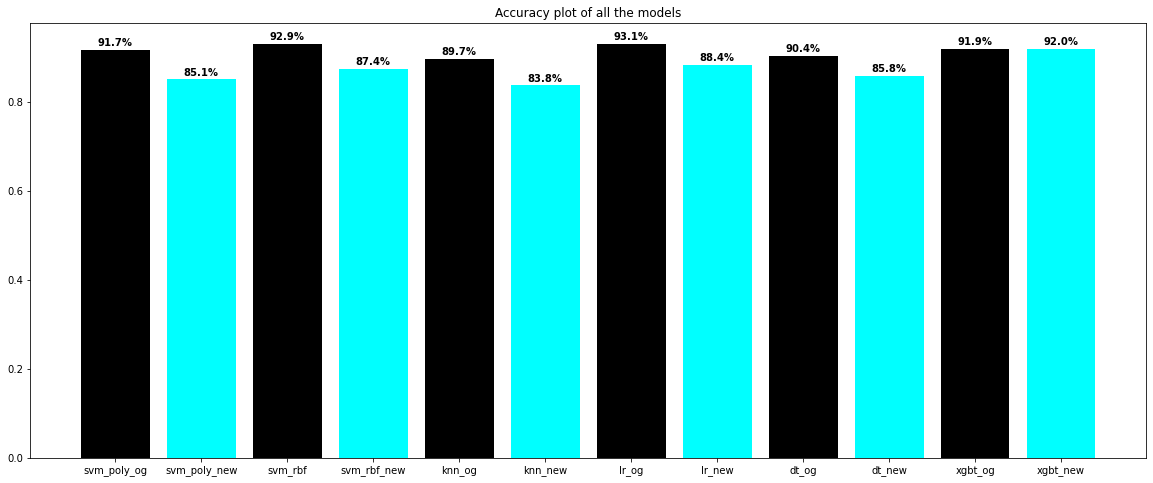

In [38]:
import matplotlib.pyplot as plt
 
data = pd.DataFrame({'Model':['svm_poly_og','svm_poly_new','svm_rbf','svm_rbf_new','knn_og','knn_new','lr_og','lr_new','dt_og','dt_new','xgbt_og','xgbt_new'],
                     'Accuracy': list(accuracy_df['accuracy']),
                     'Percentage':accuracy_df['accuracy']*100
                    })
percentage = list(accuracy_df['accuracy']*100)
 

plt.figure(figsize=(20,8))
colors_list = ['black','cyan']
graph = plt.bar(data.Model,data.Accuracy, color = colors_list)
plt.title('Accuracy plot of all the models')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data.Percentage[i])[:4]+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

<AxesSubplot:ylabel='accuracy'>

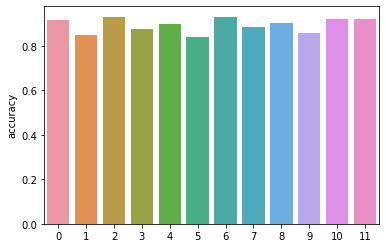

In [39]:
import seaborn as sns
sns.barplot(x= [str(i) for i in range(12)] , y = accuracy_df['accuracy'] ) #, xlabels =  ) #, data = accuracy_df.reset_index())

<AxesSubplot:xlabel='model_name'>

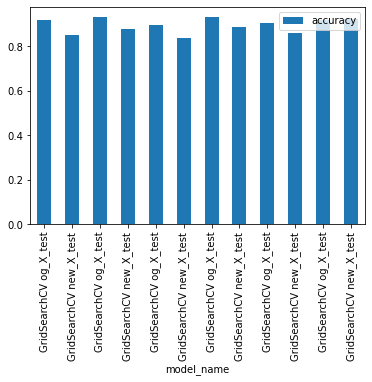

In [40]:
accuracy_df = pd.DataFrame(Accuracy)
accuracy_df = accuracy_df.set_index('model_name')
accuracy_df.plot(kind = 'bar' ) #, xticks = )

In [41]:
list(accuracy_df['accuracy'])

[0.917910447761194,
 0.8511326860841424,
 0.9298507462686567,
 0.8748651564185544,
 0.8970149253731343,
 0.8381877022653722,
 0.9313432835820895,
 0.8845738942826321,
 0.9044776119402985,
 0.8586839266450917,
 0.9194029850746268,
 0.9201725997842503]

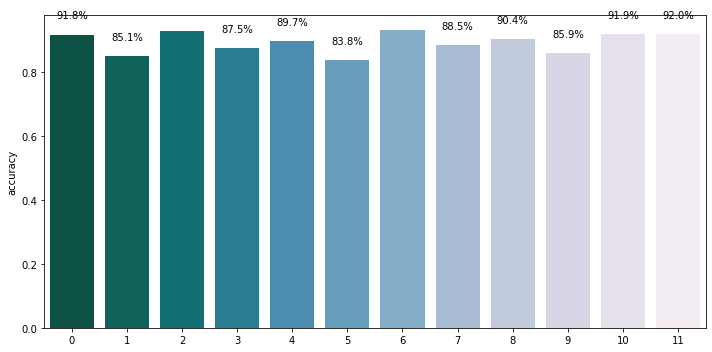

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [3.00, 2.50]
plt.rcParams["figure.autolayout"] = True
x = [str(i) for i in range(12)]
y =  accuracy_df['accuracy']
percentage = accuracy_df['accuracy']*100
fig,ax= plt.subplots(figsize=(10,5))
ax = sns.barplot(x=x, y=y, palette='PuBuGn_r', ax = ax )
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

## Testing the data

In [43]:
type(og_X_test)

pandas.core.frame.DataFrame

In [44]:
sample1 = (-1.44928,1.146792816,0.0649,-3.4092,1.441181459,3.762015716,1.7787,-1,4.09784,0.076354014,6.2495,3.4448,1.204911832,
           17.95374268,0.0682,2.277104796,8.0186,0.800456938,10.6229,6.1496,1.636577745,66.44065533,0.6799,2.298593591,
           -0.93606,0.385921357,-0.5838,-1.4266,0.337167144,0.96715367,0.4012,2.248899801,4.40406,0.087621791,4.7248,3.7308,
           0.434263449,19.54661228,0.5012,2.316167764,8.69588,0.163086244,9.0006,8.4742,0.218031264,75.65635908,0.2656,
           2.321566546,0.24454,0.806535607,1.5282,-0.932,0.909515348,0.721574346,0.7051,-1,0.68878,2.157927529,2.3481,
           -1.3281,1.664490822,2.690841646,2.9009,-1,0.47756,0.248039351,1.5301,-1.0935,0.960914064,0.966748224,0.2272,-1,
           -0.45892,0.877552253,0.4169,-1.8006,0.893285177,0.848974292,1.0481,-1,0.13042,0.029948565,0.2225,-0.1338,
           0.148763527,0.034713846,0.0251,-1,-0.21264,0.312977328,0.1197,-0.5342,0.255310719,0.09736262,0.2975,-1,-0.349284776,
           -0.675650725,-0.391120348,13.59168,-0.033875099,-0.978885625,0.237089781,14.036,-0.60960733,0.628383709,
           -0.69115267,3.0582,0.824294906,0.395767989,0.042899982,1.14926)

In [45]:
test = np.asarray(sample1)
test = test.reshape(1,-1)

In [46]:
result = svm_poly_og_model.predict(test)

In [47]:
result

array(['Walking'], dtype=object)

In [48]:
test_array = (-1.68456,0.031875948,-1.6137,-1.7274,0.046683755,2.839485892,0.0526,2.32148226,0.36944,0.030096825,0.3974,0.34,
              0.023504531,0.136927884,0.0311,2.319582857,9.62088,0.014232981,9.6391,9.5924,0.017928246,92.56158911,0.0144,
              2.32192609,-1.69816,0.002372164,-1.6744,-1.708,0.013497518,2.883893132,0.0023,2.321891518,0.3612,0.008747353,
              0.3722,0.3518,0.007666486,0.13051246,0.0063,2.321668506,9.65176,0.000741301,9.6555,9.6504,0.00211731,93.15647468,
              0.0006,2.321928067,0.0251,0.015567323,0.0607,0.0019,0.022777511,0.001045062,0.0209,1.829519961,0.0135,0.012750379,
              0.0252,0.0013,0.009284396,0.00025121,0.0096,1.988769157,-0.04932,0.023721635,-0.0152,-0.0791,0.02755988,0.0030401,
              0.0388,2.118477399,-0.00016,0.005337368,0.0066,-0.0069,0.005165559,2.14E-05,0.0055,-1,-0.0042,0.008154312,0.0073,
              -0.019,0.011815033,0.000129316,0.0183,-1,0.00134,0.002816944,0.0039,-0.0004,0.001817416,4.44E-06,0.0025,-1,
              0.811634831,-0.619748663,-0.618760557,11.67488,0.867305531,0.826591463,0.996975857,11.71112,0.546517417,
              0.38076914,-0.463296851,0.08792,0.107567846,-0.096633761,0.966183491,0.01482)

In [49]:
sample_array =  np.asarray(test_array)
sample_array = sample_array.reshape(1,-1)

In [50]:
type(sample_array)

numpy.ndarray

In [55]:
result = xgbt_og_model.predict(sample_array)

In [56]:
result

array(['Laying'], dtype=object)

In [57]:
import joblib as jbl
jbl.dump(xgbt_og_model, "xgbt_og_model.pkl")

['xgbt_og_model.pkl']

In [66]:
jbl.dump(xgbt_new_model, "xgbt_new_model.pkl")

['xgbt_new_model.pkl']

In [58]:
xgbc_model = jbl.load("xgbt_og_model.pkl")

In [60]:
xgbc_model.predict(sample_array)

array(['Laying'], dtype=object)

In [65]:
xgbc_model.predict(test)

array(['Walking'], dtype=object)